In [31]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

import numpy as np
import seaborn as sns

#Importing necessary Classifiers.
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron

import warnings
warnings.filterwarnings('ignore')

In [32]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\himi\btp\dataverse_files\segmentation\dataset1.csv")

In [33]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,142,143,144,145,146,147,148,149,150,151
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,3.600000e+02,360.000000,360.000000,360.000000,...,360.000000,360.000000,360.000000,360.000000,360.000000,3.600000e+02,360.000000,360.000000,360.000000,360.000000
mean,2050.594528,184.413889,381.336111,982.769222,763.294444,3.002901,8.067155e+04,0.983752,6691.304167,1.362344,...,140.069444,396.208333,1482.100056,794.844444,5.308637,7.679047e+04,1.483586,10339.409167,2.119765,3.500000
std,5347.520840,76.985932,130.449366,1469.521573,260.251329,8.476664,8.320191e+05,1.470995,40072.771294,2.203518,...,66.420817,135.461014,1659.203438,270.901236,6.981733,2.519505e+05,1.660853,27424.880942,2.423354,1.710202
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000
25%,611.465000,154.750000,396.000000,517.225000,795.000000,0.834590,6.965325e+02,0.517745,450.092500,0.671228,...,107.750000,408.000000,586.280000,823.000000,1.435775,2.061525e+03,0.586870,578.515000,0.760983,2.000000
50%,896.960000,206.500000,412.000000,589.940000,826.000000,1.208950,1.461600e+03,0.590530,577.960000,0.760615,...,145.000000,434.500000,857.140000,871.500000,2.774750,7.699200e+03,0.857995,1304.700000,1.142800,3.500000
75%,1578.525000,241.000000,441.000000,955.177500,887.000000,2.125425,4.517525e+03,0.956143,1592.100000,1.262400,...,187.250000,458.000000,1730.000000,927.000000,6.322750,3.997925e+04,1.731700,6602.250000,2.570750,5.000000
max,77744.000000,294.000000,510.000000,16510.000000,987.000000,123.390000,1.522500e+07,16.527000,606700.000000,24.644000,...,268.000000,516.000000,12806.000000,990.000000,54.936000,3.017900e+06,12.818000,326630.000000,18.082000,6.000000


In [34]:
df.isnull().sum().sum()

0

In [35]:
np.isinf(df).sum().sum()

0

In [36]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,142,143,144,145,146,147,148,149,150,151
0,590.10,259,396,528.90,815,0.80881,654.17,0.52943,447.74,0.66947,...,162,445,811.82,862,2.3873,5699.0,0.81263,1174.7,1.0844,1
1,684.38,254,401,582.92,804,0.95351,909.19,0.58350,579.73,0.76178,...,192,448,1211.90,900,3.0953,9581.1,1.21310,2591.2,1.6105,1
2,610.73,263,397,546.60,809,0.84223,709.35,0.54715,505.30,0.71120,...,137,495,2604.50,953,10.3160,106430.0,2.60710,15267.0,3.9093,1
3,644.44,247,407,588.72,805,0.94631,895.50,0.58931,733.88,0.85710,...,161,467,3344.90,953,13.5470,183520.0,3.34830,26299.0,5.1309,1
4,613.44,220,391,486.17,781,0.86433,747.07,0.48666,409.37,0.64014,...,141,452,2790.40,954,8.3987,70537.0,2.79320,14411.0,3.7980,1


In [37]:
# #Applying Standardscalar for scaling the features.
scaler = StandardScaler()
df_feat = scaler.fit_transform(df.drop(['151'],axis=1))
df_feat=pd.DataFrame(df_feat)

In [38]:
df_feat

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,-0.273496,0.970176,0.112567,-0.309285,0.198952,-0.259199,-0.096306,-0.309283,-0.156022,-0.314878,...,-0.436934,0.330635,0.360691,-0.404539,0.248242,-0.419008,-0.282557,-0.404545,-0.334640,-0.427839
1,-0.255841,0.905139,0.150949,-0.272474,0.156626,-0.242105,-0.095999,-0.272474,-0.152724,-0.272927,...,-0.324151,0.782930,0.382868,-0.163076,0.388710,-0.317460,-0.267127,-0.163086,-0.282918,-0.210441
2,-0.269633,1.022206,0.120244,-0.297223,0.175865,-0.255251,-0.096240,-0.297220,-0.154584,-0.295913,...,0.637539,-0.046276,0.730315,0.677411,0.584625,0.718207,0.117804,0.677410,0.179926,0.739481
3,-0.263320,0.814087,0.197008,-0.268521,0.160474,-0.242956,-0.096016,-0.268519,-0.148872,-0.229609,...,0.922642,0.315559,0.523325,1.124270,0.584625,1.181630,0.424203,1.124308,0.582748,1.244278
4,-0.269126,0.462885,0.074185,-0.338403,0.068127,-0.252640,-0.096195,-0.338399,-0.156981,-0.328207,...,0.567468,0.014029,0.412438,0.789608,0.588322,0.443208,-0.024855,0.789617,0.148670,0.693489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,-0.231038,-0.005384,0.104891,-0.315316,0.160474,-0.219377,-0.095513,-0.315315,-0.156164,-0.316814,...,0.269412,0.496477,0.412438,0.557307,0.547660,0.311984,-0.082601,0.557365,0.093716,0.609315
356,-0.193891,0.241758,0.289126,-0.207375,0.225886,-0.167870,-0.094082,-0.207374,-0.142634,-0.168208,...,2.126254,-0.483494,0.885557,1.905851,0.654859,1.973365,1.139782,1.905836,1.249165,1.883537
357,-0.199303,0.007624,0.327508,-0.261448,0.298994,-0.198999,-0.095002,-0.261446,-0.152526,-0.270573,...,-0.523875,0.134641,0.212842,-0.495903,0.200187,-0.528445,-0.294722,-0.495908,-0.351610,-0.527592
358,-0.212690,0.319803,0.243067,-0.271431,0.210495,-0.202755,-0.095101,-0.271433,-0.153136,-0.277885,...,-0.553420,0.255253,0.271981,-0.511746,0.159525,-0.556271,-0.297077,-0.511747,-0.353474,-0.540348


In [39]:
# Define a list to store the performance metrics for each classifier.
metrics_val = []
metrics_test=[]

# Initializing the classifiers.
classifiers = [
    RandomForestClassifier(),
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(n_neighbors=5),
    Perceptron(),
]

In [40]:
#Test-(Train & Validation) Split

df_feat=pd.concat([df_feat,df['151']],axis=1)
#No.of trials per activity.
group_size =6

# Create empty DataFrame for test data.
test = pd.DataFrame()

# Loop through each group and select 1 random trials.
for i in range(0, len(df_feat), group_size):
    group = df_feat.iloc[i:i+group_size]
    group_test = group.sample(n=1, random_state=42)  # randomly select 1 trials.
    test = pd.concat([test, group_test])  # add selected trials to test DataFrame.
    group_train = group.drop(index=group_test.index)  # remove selected trials from actual df.
    if i == 0:
        train = group_train
    else:
        train = pd.concat([train, group_train])
  #Drop the '1351' column
labels=train['151']
train= train.drop('151', axis=1)
print('Dimensions of Features Matrix: ',train.shape)

Dimensions of Features Matrix:  (300, 150)


In [41]:
#Testing Dataset.
X_test= test.drop('151', axis=1)
y_test=test['151']

print("Dimensions of Test Dataset: ",test.shape)
print("Dimensions of X_test Dataset: ",X_test.shape)
print("Dimensions of y_test Dataset: ",y_test.shape)
 #print(f"{type(clf).__name__} Accuracy: {acc:.3f} Precision: {prec:.3f} Recall: {rec:.3f} F1-Score: {f1:.3f} Kappa-Score: {kappa:.3f}")

Dimensions of Test Dataset:  (60, 151)
Dimensions of X_test Dataset:  (60, 150)
Dimensions of y_test Dataset:  (60,)


RandomForestClassifier Accuracy: 0.400 Precision: 0.408 Recall: 0.410 F1-Score: 0.387 Kappa-Score: 0.283


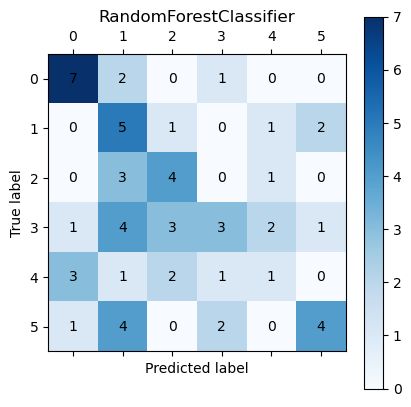

RandomForestClassifier Accuracy: 0.433 Precision: 0.447 Recall: 0.433 F1-Score: 0.423 Kappa-Score: 0.320


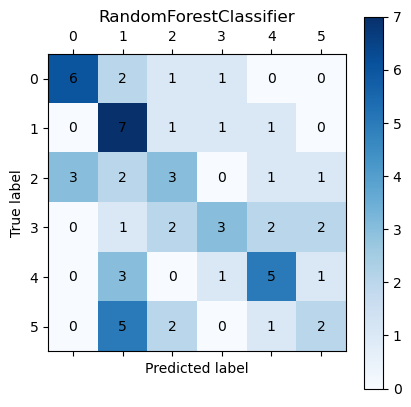

LogisticRegression Accuracy: 0.283 Precision: 0.300 Recall: 0.279 F1-Score: 0.282 Kappa-Score: 0.140


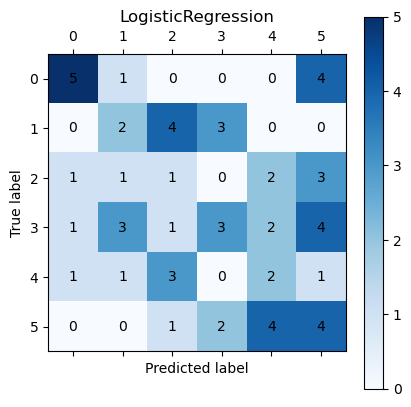

LogisticRegression Accuracy: 0.383 Precision: 0.425 Recall: 0.383 F1-Score: 0.381 Kappa-Score: 0.260


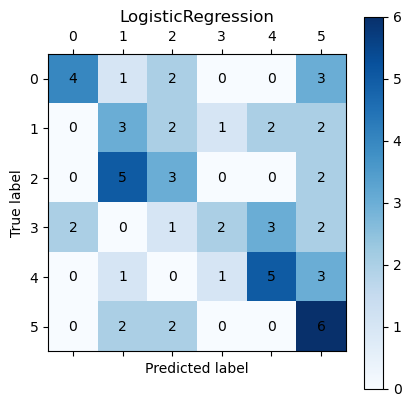

SVC Accuracy: 0.233 Precision: 0.288 Recall: 0.255 F1-Score: 0.234 Kappa-Score: 0.098


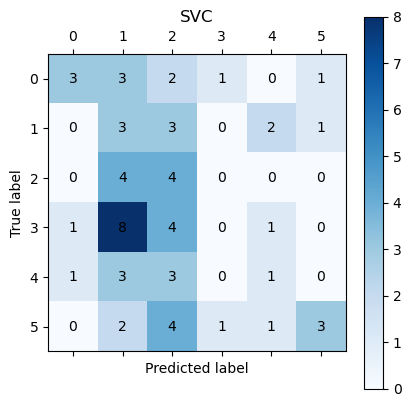

SVC Accuracy: 0.317 Precision: 0.442 Recall: 0.317 F1-Score: 0.307 Kappa-Score: 0.180


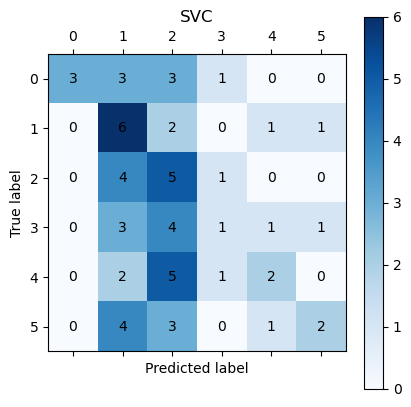

KNeighborsClassifier Accuracy: 0.350 Precision: 0.359 Recall: 0.356 F1-Score: 0.345 Kappa-Score: 0.224


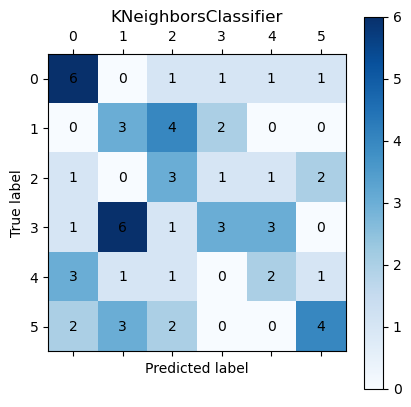

KNeighborsClassifier Accuracy: 0.333 Precision: 0.282 Recall: 0.333 F1-Score: 0.293 Kappa-Score: 0.200


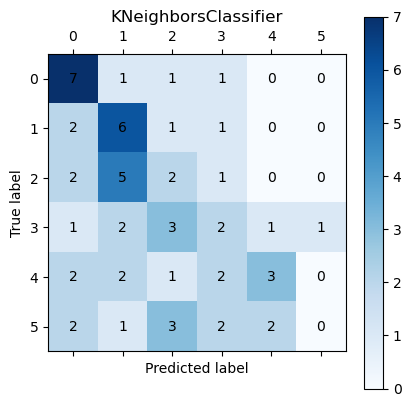

Perceptron Accuracy: 0.250 Precision: 0.269 Recall: 0.258 F1-Score: 0.238 Kappa-Score: 0.106


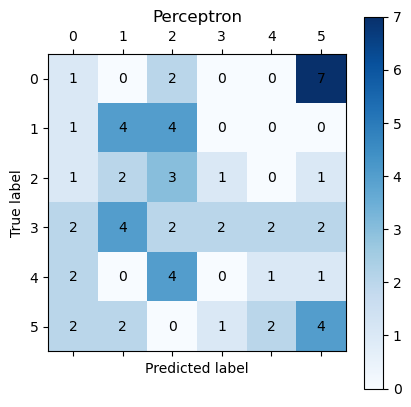

Perceptron Accuracy: 0.350 Precision: 0.373 Recall: 0.350 F1-Score: 0.346 Kappa-Score: 0.220


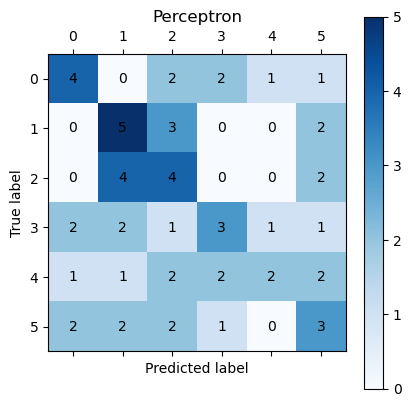

In [42]:
#Train- Validation Split.
X_train, X_val, y_train, y_val = train_test_split(train.values, labels.values, test_size=0.2, random_state=42)

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    
    cm = confusion_matrix(y_val, y_pred)
    # Calculate the Validation performance metrics.
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred, average='macro')
    rec = recall_score(y_val, y_pred, average='macro')
    f1 = f1_score(y_val, y_pred, average='macro')
    kappa = cohen_kappa_score(y_val, y_pred)
    metrics_val.append([acc, prec, rec, f1, kappa])
    print(f"{type(clf).__name__} Accuracy: {acc:.3f} Precision: {prec:.3f} Recall: {rec:.3f} F1-Score: {f1:.3f} Kappa-Score: {kappa:.3f}")
    # Plot the confusion matrix.
    
    plt.matshow(cm, cmap='Blues')
    plt.colorbar()
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(type(clf).__name__)
    plt.show()
    

    y_pred = clf.predict(X_test)
    
    # Calculate the Testing performance metrics.
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    kappa = cohen_kappa_score(y_test, y_pred)
    metrics_test.append([acc, prec, rec, f1, kappa])
    print(f"{type(clf).__name__} Accuracy: {acc:.3f} Precision: {prec:.3f} Recall: {rec:.3f} F1-Score: {f1:.3f} Kappa-Score: {kappa:.3f}")
    # Plot the confusion matrix.
    cm = confusion_matrix(y_test, y_pred)
    plt.matshow(cm, cmap='Blues')
    plt.colorbar()
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(type(clf).__name__)
    plt.show()

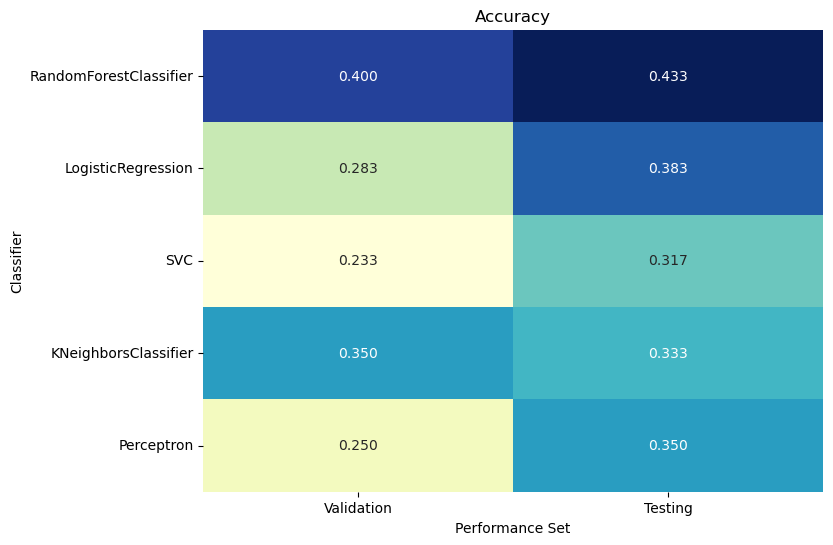

In [43]:
val_kappas = [x[0] for x in metrics_val]
test_kappas = [x[0] for x in metrics_test]

# Concatenate the two arrays row-wise
all_kappas = np.vstack((val_kappas, test_kappas))
csv_file_path = "kappas_data1.csv"
reshaped_kappas = all_kappas.reshape(5, 2)
column_names = ['Train_acc', 'Test_acc']
np.savetxt(csv_file_path, reshaped_kappas, delimiter=',', fmt='%.3f',header=','.join(column_names), comments='')
# Plot the heatmap
plt.subplots(figsize=(8, 6))
ax = sns.heatmap(all_kappas.T, cmap='YlGnBu', annot=True, xticklabels=['Validation', 'Testing'], yticklabels=[type(clf).__name__ for clf in classifiers], fmt='.3f', cbar=False)
ax.set_ylabel('Classifier')
ax.set_xlabel('Performance Set')
ax.set_title('Accuracy')
plt.show()

plt.show()